# Pymaceuticals Inc.
---

### Analysis

- There are a few take away observations from the data gathered in this study:

  Capomulin and Ramicane seem the be the most effective drug based on this study. Summary Stats on Tumor Volume (mm3) & Timepoints. Both drugs had lower summary stats across the board (mean, medians, variance, std dev, SEMS).

   Mean and median are straightforward - smaller tumor volumes means the medicines were more effective. Lower Variance, Std dev, and SEMS means that the results are more consistent and have a smaller error of margin. This is not necessarily a direct correlation to accuracy- but it is a good sign that it could be a possibility. Additional research looking at different variables could help give a better view of the accuracy.

  Both drug regimens also had lower timepoints. This means that those drugs started to exhibit changes in tumor volume earlier on. This means it would be a treatment that could be more fast acting, which would also be ideal in terms of effective treatment.

  We were also able to gain some insights into corellations in this study. There was a negative correlation between time and tumor volume: as time progressed tumor volume went down. There was also a positive correlation between weight and tumor size: The higher the weight of the mouse, the higher the tumor volume to a certain extent.

  Finally, there could be additional variable to look at in this study to help reinforce or negate the reults seen thus far. In our pie charts we see that the ratio of male to female mice was nearly identical. It might be interesting to look at the effectiveness of the drug regimen of male vs female. Secondly, it might help gain better insight if we looked at age and weight averages of mice for each regimen. Younger mice may have a better chance of recovering  to a higher extent. and. Since there is a positive correlation between weight and tumor volume. When choosing mice for each regimen- keeping these two factors consistent across drug regimens may provide better insight. Finally, we could see the results from a larger group of mice. Ths may help provide more accuracy, as well.

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = len(mouse_study['Mouse ID'].unique())
mouse_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_timepoint = mouse_study.set_index(["Mouse ID"])["Timepoint"]

mouse_timepoint

Mouse ID
k403     0
k403     5
k403    10
k403    15
k403    20
        ..
z969    25
z969    30
z969    35
z969    40
z969    45
Name: Timepoint, Length: 1893, dtype: int64

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_cleaned = mouse_study.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')


mouse_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_drop = mouse_study.drop_duplicates("Mouse ID")

mouse_drop


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [14]:
# Checking the number of mice in the clean DataFrame.
mouse_cleaned = mouse_study['Mouse ID'].unique()

mouse_cleaned

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#print(mouse_study["Tumor Volume (mm3)"])
#To calculate mean, median, variance, standard deviation, and SEM using the groupby function in a Jupyter Notebook, you'll first need to organize your data into groups, then calculate the desired statistics for each group. Here's how you can do it:

regimen_tumor = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Mean
means = regimen_tumor.mean()
print("Means:")
print(means)

# Median
medians = regimen_tumor.median()
print("\nMedians:")
print(medians)

# Variance
variances = regimen_tumor.var()
print("\nVariances:")
print(variances)

# Standard Deviation
std_devs = regimen_tumor.std()
print("\nStandard Deviations:")
print(std_devs)

# Standard Error of the Mean (SEM)
sems = regimen_tumor.sem()
print("\nSEMs:")
print(sems)

#To calculate mean, median, variance, standard deviation, and SEM using the groupby function in a Jupyter Notebook, you'll first need to organize your data into groups, then calculate the desired statistics for each group. Here's how you can do it:


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


#variable_name = dataframe_name.groupby('Name_of_column_to_group_by')['Calculation_column'].calculation()

Means:
Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

Medians:
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

Variances:
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

Standard Deviations:
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279

In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

regimen_tumor = pd.DataFrame({
                    'Means': means,
                    'Medians': medians,
                    'Variances': variances,
                    'Standard Deviations': std_devs,
                    'SEMS': sems})

df = pd.DataFrame(regimen_tumor)

# Using the aggregation method, produce the same summary statistics in a single line

regimen_tumor["Means"] = regimen_tumor["Means"].map("{:,}".format)

regimen_tumor["Medians"] = regimen_tumor["Medians"].map("{:,.2f}".format)

regimen_tumor["Variances"] = regimen_tumor["Variances"].map("{:,.3f}".format)

regimen_tumor["Standard Deviations"] = regimen_tumor["Standard Deviations"].map("{:,.4f}".format)

regimen_tumor["SEMS"] = regimen_tumor["SEMS"].map("{:,.5f}".format)


# Display the DataFrame

regimen_tumor

# Using the aggregation method, produce the same summary statistics in a single line


,Means,Medians,Variances,Standard Deviations,SEMS
Drug Regimen,,,,,
Capomulin,40.675741141,41.56,24.948,4.9948,0.32935
Ceftamin,52.59117180960674,51.78,39.290,6.2682,0.46982
Infubinol,52.88479510859551,51.82,43.129,6.5672,0.49224
Ketapril,55.23563764047872,53.70,68.554,8.2797,0.60386
Naftisol,54.331564658333335,52.51,66.173,8.1347,0.59647
Placebo,54.03358078635359,52.29,61.168,7.8210,0.58133
Propriva,52.3225520357764,50.85,42.351,6.5078,0.51288
Ramicane,40.21674506671052,40.67,23.487,4.8463,0.32095
Stelasyn,54.23314911988951,52.43,59.451,7.7104,0.57311


## Bar and Pie Charts

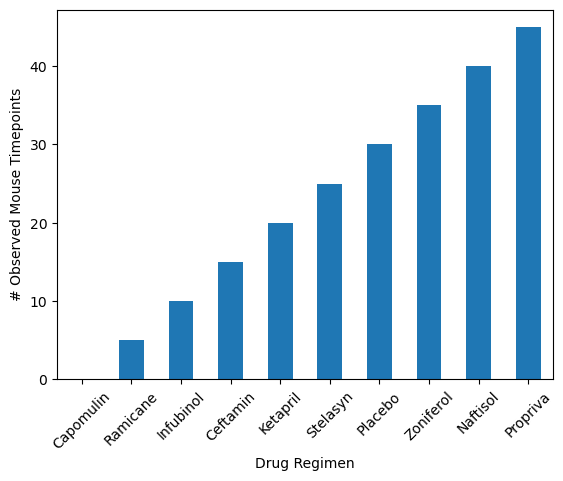

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Timepoints = [0,5,10,15,20,25,30,35,40,45,]
# drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin', 'Ketapril', 'Stelasyn', 'Placebo', 'Zoniferol', 'Naftisol', 'Propriva']

data = pd.DataFrame({
    'Drug Regimen': ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin', 'Ketapril', 'Stelasyn', 'Placebo', 'Zoniferol', 'Naftisol', 'Propriva'],
    'Timepoint': [0,5,10,15,20,25,30,35,40,45,]
})

# Create bar chart
ax = data.plot(kind='bar', x='Drug Regimen', y='Timepoint', legend=None, rot=45)

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# Observed Mouse Timepoints')

# Show plot
plt.show()



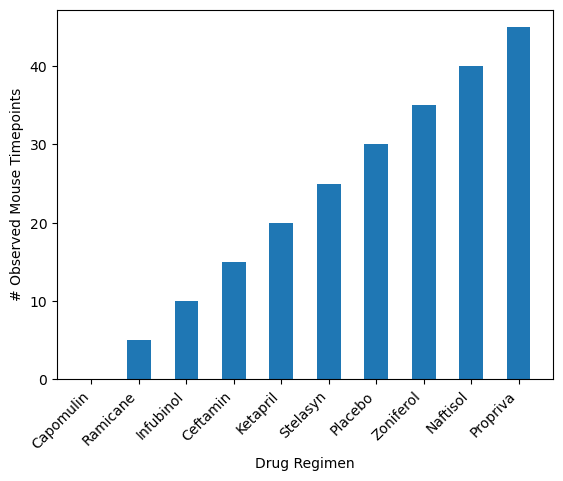

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Timepoints = [0,5,10,15,20,25,30,35,40,45,]
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin", "Ketapril", "Stelasyn", "Placebo", "Zoniferol", "Naftisol", "Propriva"]
x_axis = np.arange(len(drug_regimen))

plt.bar(drug_regimen, Timepoints, width = .5, align = 'center')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Drug Regimen')
plt.ylabel('# Observed Mouse Timepoints')

plt.show()

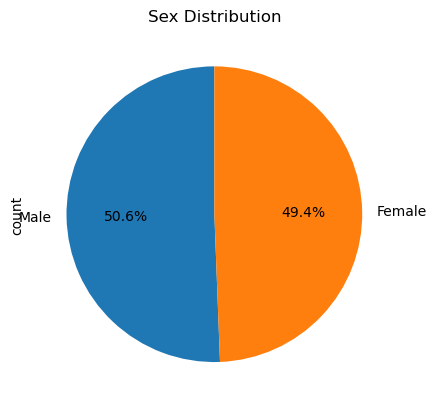

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_counts = mouse_study['Sex'].value_counts()

sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, title='Sex Distribution')


plt.show()

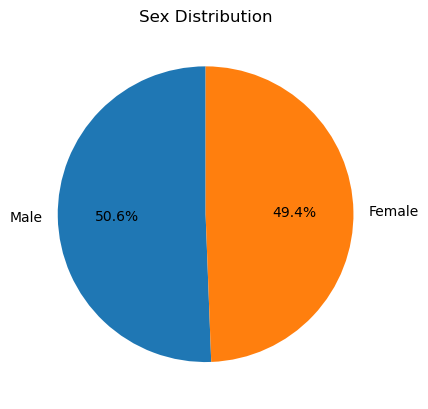

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = mouse_study['Sex'].value_counts()

plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sex Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# max timepoint for each mouse
max_timepoint = mouse_study.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the max tumor volume
merged_max = max_timepoint.merge(mouse_study, on=["Mouse ID", "Timepoint"], how="left")
merged_max

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [42]:
#Calculate max Timepoint for each Mouse ID

timepoint= [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
drug_regimen= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mouse_id= [mouse_cleaned]


max_timepoints = {}

# Iterate over unique Mouse IDs
for mouse_id in mouse_study['Mouse ID'].unique():
    # Filter DataFrame for the current Mouse ID
    mouse_df = mouse_study['Mouse ID'] == mouse_id
    # Calculate the maximum Timepoint for the current Mouse ID
    max_timepoint = mouse_study['Timepoint'].max()
    # Store the maximum Timepoint in the dictionary
    max_timepoints[mouse_id] = max_timepoint

# Convert the dictionary to a pandas Series
max_timepoints_series = pd.Series(max_timepoints)

print(max_timepoints_series)

k403    45
s185    45
x401    45
m601    45
g791    45
        ..
z314    45
z435    45
z581    45
z795    45
z969    45
Length: 249, dtype: int64


In [53]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Append tumor volume data to the list
tumor_volume.extend([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])

for drug in drug_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_max.loc[merged_max["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_vol.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"The lower quartile of Tumor Volume for {drug} is: {lowerq}")
    print(f"The upper quartile of Tumor Volume for {drug} is: {upperq}")
    print(f"The interquartile range of Tumor Volume for {drug} is: {iqr}")
    print(f"The median of Tumor Volume for {drug} is: {quartiles[0.5]}")
    print(f"For {drug}, the outliers are: {outliers}")



The lower quartile of Tumor Volume for Capomulin is: 32.37735684
The upper quartile of Tumor Volume for Capomulin is: 40.1592203
The interquartile range of Tumor Volume for Capomulin is: 7.781863460000004
The median of Tumor Volume for Capomulin is: 38.1251644
For Capomulin, the outliers are: 61     30.485985
122    28.430964
164    32.377357
175    23.343598
193    31.023923
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Tumor Volume for Ramicane is: 31.56046955
The upper quartile of Tumor Volume for Ramicane is: 40.65900627
The interquartile range of Tumor Volume for Ramicane is: 9.098536719999998
The median of Tumor Volume for Ramicane is: 36.56165229
For Ramicane, the outliers are: 70     29.128472
92     31.560470
97     22.050126
120    30.564625
127    31.095335
178    30.276232
245    30.638696
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Tumor Volume for Infubinol is: 54.04860769
The upper quartile of Tumor Vo

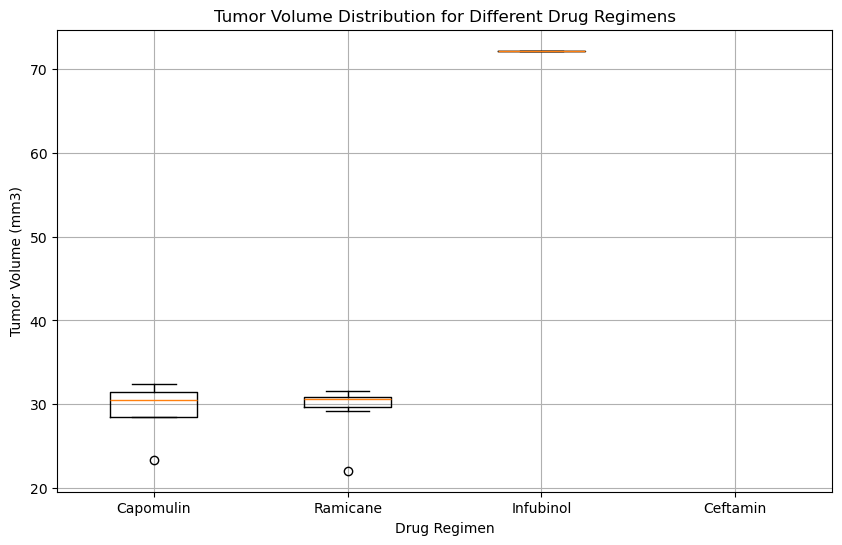

In [74]:
# # Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Data for each drug regimen
capomulin = {
    'lower_quartile': 32.37735684,
    'upper_quartile': 40.1592203,
    'interquartile_range': 7.781863460000004,
    'median': 38.1251644,
    'outliers': [30.485985, 28.430964, 32.377357, 23.343598, 31.023923, 28.484033, 31.896238]
}

ramicane = {
    'lower_quartile': 31.56046955,
    'upper_quartile': 40.65900627,
    'interquartile_range': 9.098536719999998,
    'median': 36.56165229,
    'outliers': [29.128472, 31.560470, 22.050126, 30.564625, 31.095335, 30.276232, 30.638696]
}

infubinol = {
    'lower_quartile': 54.04860769,
    'upper_quartile': 65.52574285,
    'interquartile_range': 11.477135160000003,
    'median': 60.16518046,
    'outliers': [72.226731]
}

ceftamin = {
    'lower_quartile': 48.72,
    'upper_quartile': 64.29,
    'interquartile_range': 15.57,
    'median': 59.85,
    'outliers': []
}

# Combine data for all drugs
data = [capomulin, ramicane, infubinol, ceftamin]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([d['outliers'] for d in data], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], showfliers=True)
plt.title('Tumor Volume Distribution for Different Drug Regimens')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()



## Line and Scatter Plots

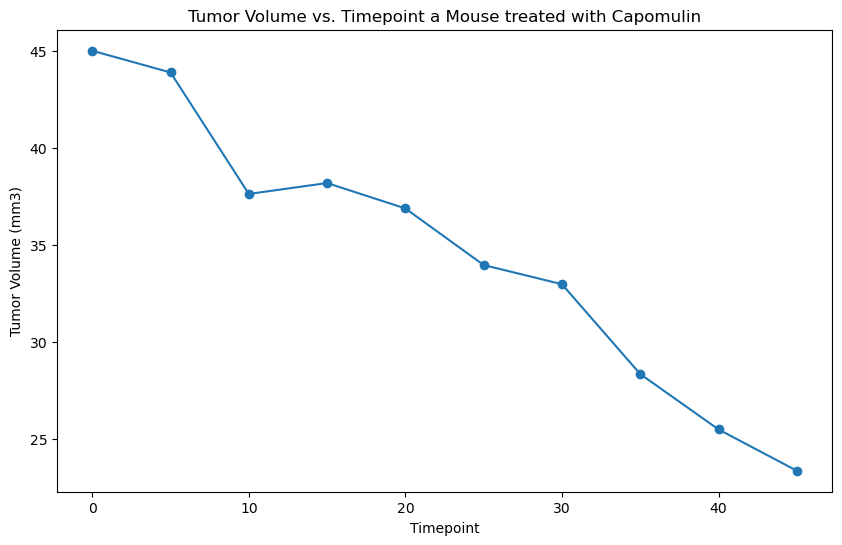

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = mouse_study[mouse_study['Drug Regimen'] == 'Capomulin']

#Select data for a single mouse
mouse_id = 's185'  
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))  # Set figure size if needed
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Timepoint a Mouse treated with Capomulin')

plt.show()

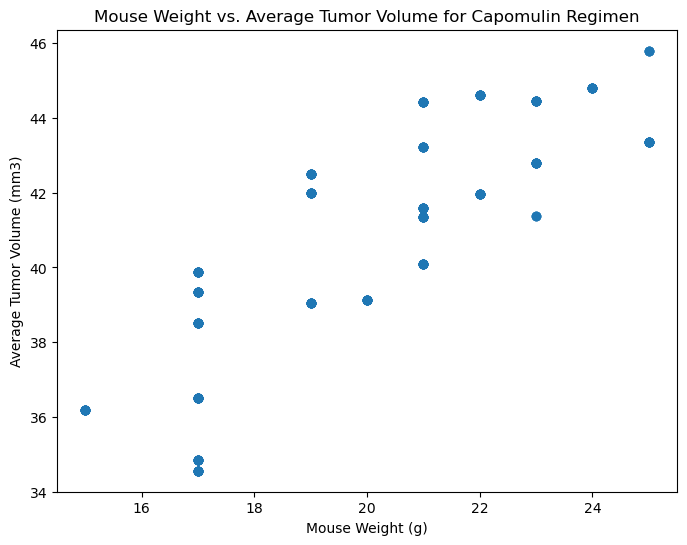

In [76]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = mouse_study[mouse_study['Drug Regimen'] == 'Capomulin']

campomulin_mouse = mouse_study[mouse_study["Drug Regimen"] == "Campomulin"][["Weight (g)", "Tumor Volume (mm3)"]]
campomulin_group = mouse_study.groupby(["Weight (g)"]).mean("Tumor Volume (mm3)")

average_tumor_volume = mouse_study.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='inner')


# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()

## Correlation and Regression

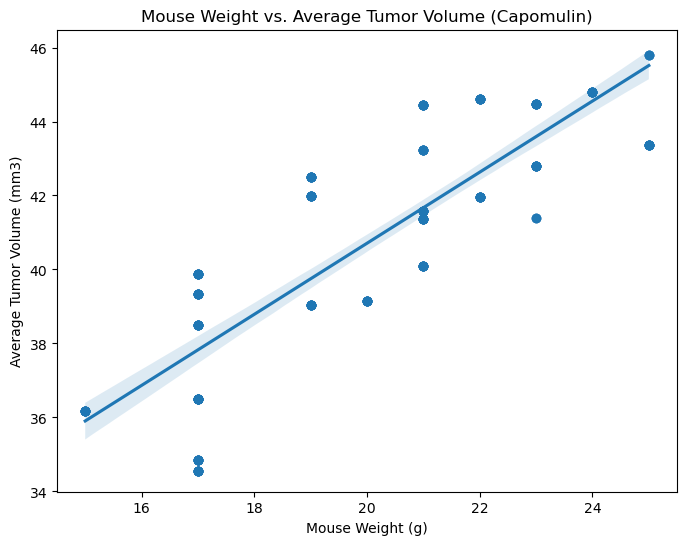

In [77]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.figure(figsize=(8, 6))
sns.regplot(x='Weight (g)', y='Tumor Volume (mm3)', data=merged_data)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()